In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data= pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
dataframe= test_data[['PassengerId']]

In [5]:
train_data = train_data.drop(columns=["Name","PassengerId"])
test_data = test_data.drop(columns=["Name","PassengerId"])

In [6]:
train_data = train_data.drop(columns=["Ticket"])
test_data = test_data.drop(columns=["Ticket"])

In [7]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [8]:
train_data= pd.get_dummies(train_data,columns=["Sex"])
test_data= pd.get_dummies(test_data,columns=["Sex"])

In [9]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,NaN,S,0,1
1,1,1,38.0,1,0,71.2833,C85,C,1,0
2,1,3,26.0,0,0,7.9250,NaN,S,1,0
3,1,1,35.0,1,0,53.1000,C123,S,1,0
4,0,3,35.0,0,0,8.0500,NaN,S,0,1


In [10]:
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,NaN,Q,0,1
1,3,47.0,1,0,7.0000,NaN,S,1,0
2,2,62.0,0,0,9.6875,NaN,Q,0,1
3,3,27.0,0,0,8.6625,NaN,S,0,1
4,3,22.0,1,1,12.2875,NaN,S,1,0


In [11]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,NaN,S,0,1
1,1,1,38.0,1,0,71.2833,C85,C,1,0
2,1,3,26.0,0,0,7.9250,NaN,S,1,0
3,1,1,35.0,1,0,53.1000,C123,S,1,0
4,0,3,35.0,0,0,8.0500,NaN,S,0,1


Replace all non NaN value with 1

In [12]:
cabin_data=pd.DataFrame(np.where(train_data.Cabin.isna(),train_data.Cabin,1), columns=["Cabin"])

Replace all Nan value with 0

In [13]:
cabin_data["Cabin"]= cabin_data["Cabin"].replace(np.nan,0)

In [14]:
cabin_data.head()

,Cabin
0,0
1,1
2,0
3,1
4,0


In [15]:
cabin_test_data=pd.DataFrame(np.where(test_data.Cabin.isna(),test_data.Cabin,1), columns=["Cabin"])
cabin_test_data["Cabin"]= cabin_test_data["Cabin"].replace(np.nan,0)
cabin_test_data.head()

,Cabin
0,0
1,0
2,0
3,0
4,0


In [16]:
test_data = test_data.drop(columns=["Cabin"])

In [17]:
train_data = train_data.drop(columns=["Cabin"])

new column similar to index, which can be use to merge cabin data along with train data

In [18]:
train_data['index1'] = train_data.index
cabin_test_data['index1'] = cabin_test_data.index

In [19]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,index1
0,0,3,22.0,1,0,7.2500,S,0,1,0
1,1,1,38.0,1,0,71.2833,C,1,0,1
2,1,3,26.0,0,0,7.9250,S,1,0,2
3,1,1,35.0,1,0,53.1000,S,1,0,3
4,0,3,35.0,0,0,8.0500,S,0,1,4


In [20]:
train_data = train_data.merge(cabin_test_data,how='inner', on='index1')

creating index column and merging 

In [21]:
test_data['index1'] = test_data.index
cabin_data['index1'] = cabin_data.index

In [22]:
test_data = test_data.merge(cabin_test_data,how='inner', on='index1')

In [23]:
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,index1,Cabin
0,3,34.5,0,0,7.8292,Q,0,1,0,0
1,3,47.0,1,0,7.0000,S,1,0,1,0
2,2,62.0,0,0,9.6875,Q,0,1,2,0
3,3,27.0,0,0,8.6625,S,0,1,3,0
4,3,22.0,1,1,12.2875,S,1,0,4,0


now we can drop index1 in test and train data

In [24]:
test_data = test_data.drop(columns=["index1"])
train_data = train_data.drop(columns=["index1"])

finding correlation between columns

In [25]:
train_data= pd.get_dummies(train_data,columns=["Embarked"])
test_data= pd.get_dummies(test_data,columns=["Embarked"])

Binning- converting numerical value to categorical value

In [26]:
# for dataset in train_data:
# # for row in train_data.itertuples():
#     dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
#     dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
#     dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
#     dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
#     dataset.loc[ dataset['Age'] > 62, 'Age'] = 4
# pd.qcut(train_data['Age'], q=5)
# define bins as 0-16, 16-26 and so on (as 17 will not be included)
bins= [0,17,27,37,63,200]


In [27]:
# train_data1 = train_data
train_data['Age']=pd.cut(train_data['Age'],bins,labels=False)

Binning on test data too

In [28]:
test_data['Age']=pd.cut(test_data['Age'],bins,labels=False)

In [29]:
# for dataset in train_test_data:
#     dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0,
#     dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
#     dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
#     dataset.loc[dataset['Fare'] >= 100, 'Fare'] = 3
bins=[0,18,31,101,500]
train_data['Fare']=pd.cut(train_data['Fare'],bins,labels=False)
test_data['Fare']=pd.cut(test_data['Fare'],bins,labels=False)

one hot encoding of categorical attributes

In [30]:
train_data= pd.get_dummies(train_data,columns=["Fare"])
test_data= pd.get_dummies(test_data,columns=["Fare"])

In [31]:
train_data= pd.get_dummies(train_data,columns=["Age"])
test_data= pd.get_dummies(test_data,columns=["Age"])

In [32]:
# train_data['Age'].describe
train_data.head()

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Cabin,Embarked_C,Embarked_Q,Embarked_S,Fare_0.0,Fare_1.0,Fare_2.0,Fare_3.0,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Age_4.0
0,0,3,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
1,1,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,1,3,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0
3,1,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
4,0,3,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0


Normalization column='Fare'

In [33]:
# from sklearn.preprocessing import StandardScaler
# cols_to_norm = ['Fare']
# train_data[cols_to_norm] = StandardScaler().fit_transform(train_data[cols_to_norm])

In [34]:
# cols_to_norm = ['Fare']
# test_data[cols_to_norm] = StandardScaler().fit_transform(test_data[cols_to_norm])

Correlations

In [35]:
# import pandas_profiling as pp
# pp.ProfileReport(train_data)

In [36]:
# np.corrcoef(train_data['Pclass'],train_data['Survived'])
train_data['Pclass'].corr(train_data['Survived'])

-0.24717421412995905

In [37]:
train_data['SibSp'].corr(train_data['Survived'])

-0.07196774287304271

In [38]:
train_data['Parch'].corr(train_data['Survived'])

0.07218450869973854

In [39]:
train_data['Sex_female'].corr(train_data['Survived'])

0.5813300136642512

In [40]:
train_data['Sex_male'].corr(train_data['Survived'])

-0.5813300136642512

In [41]:
train_data['Cabin'].corr(train_data['Survived'])

-0.0889707185873186

Data Visualization 

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
train_data.head()

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Cabin,Embarked_C,Embarked_Q,Embarked_S,Fare_0.0,Fare_1.0,Fare_2.0,Fare_3.0,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Age_4.0
0,0,3,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
1,1,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,1,3,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0
3,1,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
4,0,3,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0


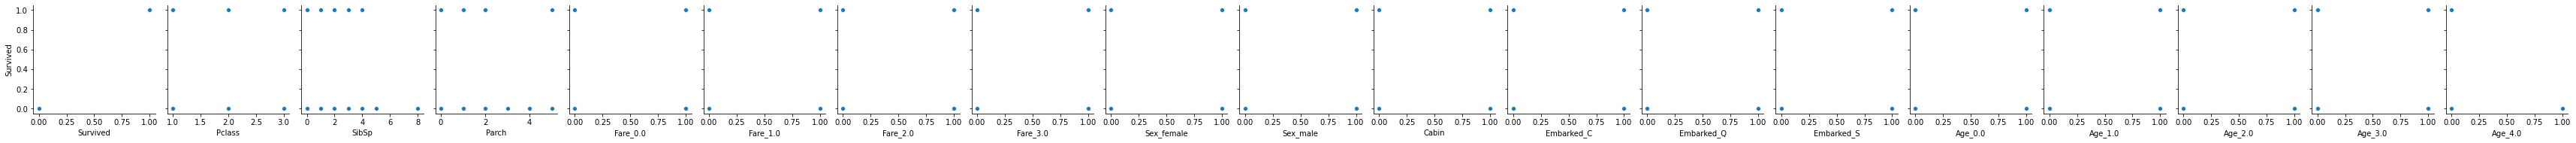

In [44]:
sns.pairplot(train_data,
                 x_vars=['Survived','Pclass','SibSp','Parch','Fare_0.0','Fare_1.0','Fare_2.0','Fare_3.0','Sex_female','Sex_male','Cabin','Embarked_C','Embarked_Q','Embarked_S','Age_0.0','Age_1.0','Age_2.0','Age_3.0','Age_4.0'],
                 y_vars=["Survived"])
# "Fare"

Text(0, 0.5, 'Survived')

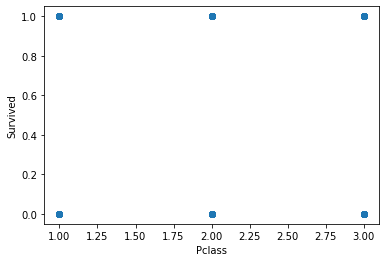

In [45]:
plt.scatter(train_data['Pclass'],train_data['Survived'])
plt.xlabel('Pclass')
plt.ylabel('Survived')

In [46]:
x = train_data.drop(columns=["Survived"])
x.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male,Cabin,Embarked_C,Embarked_Q,Embarked_S,Fare_0.0,Fare_1.0,Fare_2.0,Fare_3.0,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Age_4.0
0,3,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
1,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,3,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0
3,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
4,3,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0


In [47]:
y= train_data['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Model_split

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=10)

In [49]:
# from sklearn.ensemble import RandomForestRegressor
# model= RandomForestRegressor(random_state=10,n_estimators=250, max_depth=None, n_jobs=-1, warm_start=True)

In [50]:
# model.fit(x_train,y_train)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [52]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [53]:
import sklearn
from sklearn.metrics import mean_squared_error
sklearn.metrics.mean_squared_error(y_test, y_pred)

0.21428571428571427

In [54]:
sklearn.metrics.accuracy_score(y_test,y_pred.round())

0.7857142857142857

In [55]:
test_data

,Pclass,SibSp,Parch,Sex_female,Sex_male,Cabin,Embarked_C,Embarked_Q,Embarked_S,Fare_0.0,Fare_1.0,Fare_2.0,Fare_3.0,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Age_4.0
0,3,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
1,3,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,2,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
3,3,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
4,3,1,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
414,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0
415,3,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
416,3,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0


Extension Imputation

In [56]:
# from sklearn.impute import SimpleImputer
# # make copy to avoid changing original data (when Imputing)
# new_data = test_data.copy()

# # make new columns indicating what will be imputed
# cols_with_missing = (col for col in new_data.columns 
#                                  if new_data[col].isnull().any())
# for col in cols_with_missing:
#     new_data[col + '_was_missing'] = new_data[col].isnull()

# # Imputation
# my_imputer = SimpleImputer()
# new_data = pd.DataFrame(my_imputer.fit_transform(new_data))
# new_data.columns = test_data.columns
# data_without_missing_values = test_data.dropna(axis=1)

In [57]:
test_data.columns[test_data.isna().any()].tolist()


[]

In [58]:
# test_data["Fare"]= test_data["Fare"].replace(np.nan,0)

predicting output on test data

In [ ]:
y_final= (model.predict(test_data))

In [ ]:
dataframe['Survived']=y_final.astype(int)

In [ ]:
dataframe.head()

In [ ]:
dataframe.to_csv('titanic_output2.csv',index=False)